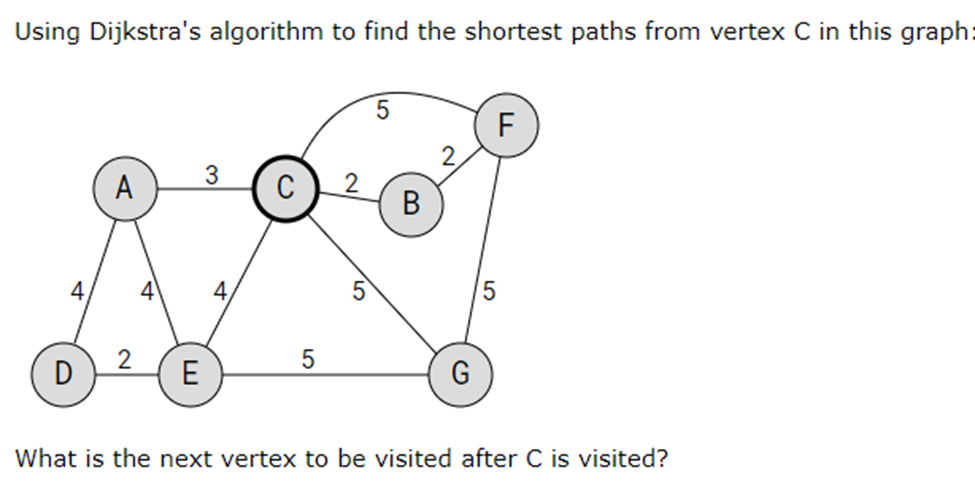

Хамгийн богино зам = 10


---


D-E = 2
E-C = 4
C-B = 2
B-F = 2

In [8]:
class Graph:  # Граф хэмээх классыг тодорхойлж байна.
    def __init__(self, size):  # Графын анхны төлөвийг үүсгэх `__init__` функц.
        # `size` хэмжээтэй adjacency matrix (салбарласан хүснэгт) үүсгэж байна.
        self.adj_matrix = [[0]*size for _ in range(size)]
        self.size = size  # Графын хэмжээ буюу оройнуудын тоог хадгална.
        self.vetrex_data = ['']*size  # Орой бүрт харгалзах өгөгдлийг хадгалах хоосон массив үүсгэнэ.

    def add_edge(self, u, v, weight):  # Хоёр оройг холбоход ашиглах функц.
        # `u` болон `v` оройнууд графын хязгаарт байгаа эсэхийг шалгана.
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight  # `u`-аас `v` орой руу чиглэх жинг оруулна.
            self.adj_matrix[v][u] = weight  # `v`-ээс `u` орой руу чиглэх жинг мөн оруулна (хэрэв граф чиглэлгүй бол).

    def add_vertex_data(self, vertex, data):  # Оройд нэмэлт өгөгдөл хадгалах функц.
        if 0 <= vertex < self.size:  # Орой зөв хязгаарт байгаа эсэхийг шалгана.
            self.vertex_data[vertex] = data  # Оройн өгөгдлийг хадгална (засварлахад алдаа гарсан `vertex_data` биш `vetrex_data` байх ёстой).

In [9]:
    def dijkstra(self, start_vertex_data):  # Дейкстрагийн алгоритмыг хэрэгжүүлэх функц.
        # Өгөгдсөн оройн өгөгдлийг ашиглан индексийг олох.
        start_vertex = self.vertex_data.index(start_vertex_data)

        # Бүх оройн эхлэлийн зайг "хязгааргүй" гэж тодорхойлно.
        distances = [float('inf')] * self.size
        distances[start_vertex] = 0  # Эхлэх оройн зайг 0 болгоно.

        visited = [False] * self.size  # Орой бүрийг эхэндээ "очоогүй" гэж тэмдэглэнэ.

        for _ in range(self.size):  # Бүх оройг шалгана.
            min_distance = float('inf')  # Хамгийн бага зайг хадгалах хувьсагч.
            u = None  # Хамгийн бага зайтай оройн индекс.

            # Одоо хамгийн бага зайтай очоогүй оройг хайна.
            for j in range(self.size):
                if not visited[j] and distances[j] < min_distance:
                    min_distance = distances[j]
                    u = j

            if u is None:  # Хэрэв очих боломжтой орой байхгүй бол давталтыг зогсооно.
                break

            visited[u] = True  # Одоо `u` орой руу очсоныг тэмдэглэнэ.

            # `u` оройгоос хөрш оройнууд руу зайг шинэчлэнэ.
            for v in range(self.size):
                if self.adi_matrix[u][v] != 0 and not visited[v]:
                    # `alt` нь `u` оройгоор дайрахад үүсэх шинэ зай.
                    alt = distances[u] + self.adi_matrix[u][v]
                    if alt < distances[v]:  # Хэрэв шинэ зам богино байвал шинэчлэнэ.
                        distances[v] = alt

        return distances  # Бүх орой руу буцаана

In [11]:
%%writefile test.c
#include <limits.h>  // INT_MAX тогтмолыг ашиглахын тулд оролцуулсан
#include <stdbool.h> // bool төрлийг ашиглахын тулд оролцуулсан
#include <stdio.h>   // printf() функц ашиглахын тулд оролцуулсан

#define V 9  // Оргилын тоог 9 гэж тодорхойлсон

// `minDistance` функц нь хамгийн бага замын урттай, хараахан сонгогдоогүй оройг олно
int minDistance(int dist[], bool sptSet[])
{
    int min = INT_MAX, min_index;

    // Бүх оройг шалгаж, хамгийн бага замтайг нь сонгоно
    for (int v = 0; v < V; v++)
        if (sptSet[v] == false && dist[v] <= min)
            min = dist[v], min_index = v;

    return min_index;
}

// `printSolution` функц нь эх үүсвэрээс бусад орой хүртэлх хамгийн богино замыг хэвлэнэ
void printSolution(int dist[])
{
    printf("Vertex \t\t Distance from Source\n");
    for (int i = 0; i < V; i++)
        printf("%d \t\t\t\t %d\n", i, dist[i]);
}

// `dijkstra` алгоритмыг хэрэгжүүлсэн функц
void dijkstra(int graph[V][V], int src)
{
    int dist[V];    // Эх үүсвэрээс бусад орой хүртэлх хамгийн богино зайг хадгална
    bool sptSet[V]; // Орой нь хамгийн богино замдаа багтсан эсэхийг хадгална

    // Эхний утгуудыг оноох
    for (int i = 0; i < V; i++) {
        dist[i] = INT_MAX, sptSet[i] = false;
    }

    dist[src] = 0; // Эх үүсвэрийн зайг 0 болгож оноох

    // Бүх оройг сонгох хүртэл давталт
    for (int count = 0; count < V - 1; count++) {
        int u = minDistance(dist, sptSet); // Одоогийн хамгийн бага замтай оройг олох
        sptSet[u] = true; // Сонгогдсон оройг багцад оруулах

        // Сонгосон оройгоос холбогдсон оройнуудыг шинэчлэх
        for (int v = 0; v < V; v++)
            if (!sptSet[v] && graph[u][v] && dist[u] != INT_MAX
                && dist[u] + graph[u][v] < dist[v])
                dist[v] = dist[u] + graph[u][v];
    }

    printSolution(dist); // Шийдлийг хэвлэх
}

// `main` функц: Графыг тодорхойлж, `dijkstra` алгоритмыг дуудна
int main() {
    // Графыг хөрш матриц хэлбэрээр тодорхойлсон
    int graph[V][V] = {
        { 0, 4, 0, 0, 0, 0, 0, 8, 0 },
        { 4, 0, 8, 0, 0, 0, 0, 11, 0 },
        { 0, 8, 0, 7, 0, 4, 0, 0, 2 },
        { 0, 0, 7, 0, 9, 14, 0, 0, 0 },
        { 0, 0, 0, 9, 0, 10, 0, 0, 0 },
        { 0, 0, 4, 14, 10, 0, 2, 0, 0 },
        { 0, 0, 0, 0, 0, 2, 0, 1, 6 },
        { 8, 11, 0, 0, 0, 0, 1, 0, 7 },
        { 0, 0, 2, 0, 0, 0, 6, 7, 0 }
    };

    dijkstra(graph, 0); // Эхлэх оройг 0 гэж авч, `dijkstra` функцыг ажиллуулах

    return 0; // Програмыг дуусгах
}

Writing test.c


In [13]:
%%bash
gcc test.c -o test
./test

Vertex 		 Distance from Source
0 				 0
1 				 4
2 				 12
3 				 19
4 				 21
5 				 11
6 				 9
7 				 8
8 				 14


In [10]:
class Graph:
    def __init__(self, size):
        # Графын adjacency matrix буюу хөрш зангилааны матриц үүсгэж байна
        self.adj_matrix = [[0] * size for _ in range(size)]  # size x size хэмжээтэй 2D массив
        self.size = size  # Графын нийт зангилааны тоо
        self.vertex_data = [''] * size  # Зангилаануудын нэрийг хадгалах массив

    def add_edge(self, u, v, weight):
        # u, v хоёр зангилааг weight жинтэйгээр холбоно (хоёр чиглэлтэй зам)
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # Мэдээллийг 2 талд хадгална

    def add_vertex_data(self, vertex, data):
        # Зангилаанд нэр оноох
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def dijkstra(self, start_vertex_data):
        # Dijkstra-ийн алгоритмыг хэрэгжүүлж, өгөгдсөн зангилаанаас бусад зангилаа хүртэлх хамгийн бага замыг олно
        start_vertex = self.vertex_data.index(start_vertex_data)  # Өгөгдсөн зангилааны индексийг олох
        distances = [float('inf')] * self.size  # Бүх зайг эхлээд "∞" (хязгааргүй) гэж тэмдэглэнэ
        distances[start_vertex] = 0  # Эхлэх цэгээс өөртөө зай 0 байна
        visited = [False] * self.size  # Айлчлагдсан эсэхийг шалгах массив

        for _ in range(self.size):  # Нийт зангилааны тоогоор давтаж ажиллана
            min_distance = float('inf')
            u = None
            for i in range(self.size):  # Одоогоор хамгийн бага замтай зангилааг олох
                if not visited[i] and distances[i] < min_distance:
                    min_distance = distances[i]
                    u = i

            if u is None:  # Хэрэв хүрэх боломжгүй зангилаа байвал зогсооно
                break

            visited[u] = True  # Одоогийн зангилааг айлчилсан гэж тэмдэглэнэ

            for v in range(self.size):  # Хөршүүдийг шалгах
                if self.adj_matrix[u][v] != 0 and not visited[v]:  # Холбогдсон бөгөөд айлчлаагүй байх
                    alt = distances[u] + self.adj_matrix[u][v]  # Шинэ боломжит замыг тооцоолох
                    if alt < distances[v]:  # Хэрэв шинэ зам нь өмнөхөөс богино байвал шинэчлэх
                        distances[v] = alt

        return distances  # Бүх зангилааны хамгийн бага зайнуудыг буцаана

# 7 зангилаатай граф үүсгэх
g = Graph(7)

# Зангилаануудын нэрийг оноож байна
g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

# Графын ирмэгүүдийг нэмэх (замууд ба жингүүд)
g.add_edge(3, 0, 4)  # D - A, жин 4
g.add_edge(3, 4, 2)  # D - E, жин 2
g.add_edge(0, 2, 3)  # A - C, жин 3
g.add_edge(0, 4, 4)  # A - E, жин 4
g.add_edge(4, 2, 4)  # E - C, жин 4
g.add_edge(4, 6, 5)  # E - G, жин 5
g.add_edge(2, 5, 5)  # C - F, жин 5
g.add_edge(2, 1, 2)  # C - B, жин 2
g.add_edge(1, 5, 2)  # B - F, жин 2
g.add_edge(6, 5, 5)  # G - F, жин 5

# Dijkstra-ийн алгоритмыг "D" зангилаанаас эхлүүлж ажиллуулах
print("\nDijkstra's Algorithm starting from vertex D:")
distances = g.dijkstra('D')
for i, d in enumerate(distances):
    print(f"Distance from D to {g.vertex_data[i]}: {d}")  # D-ээс бусад зангилаа хүртэлх хамгийн бага зайнуудыг хэвлэх


Dijkstra's Algorithm starting from vertex D:
Distance from D to A: 4
Distance from D to B: 8
Distance from D to C: 6
Distance from D to D: 0
Distance from D to E: 2
Distance from D to F: 10
Distance from D to G: 7
